In [5]:
import seaborn as sb
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import math as m

# Загрузка данных

In [6]:
df = pd.read_csv('./sample_data/real_estate_data.csv')
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


# Предварительный анализ

In [7]:
df.shape

(18456, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456 entries, 0 to 18455
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18456 non-null  int64  
 1   type               18456 non-null  object 
 2   sub_type           18456 non-null  object 
 3   start_date         18456 non-null  object 
 4   end_date           11620 non-null  object 
 5   listing_type       18456 non-null  int64  
 6   tom                18456 non-null  int64  
 7   building_age       17756 non-null  object 
 8   total_floor_count  17940 non-null  object 
 9   floor_no           17371 non-null  object 
 10  room_count         18456 non-null  object 
 11  size               12687 non-null  float64
 12  address            18456 non-null  object 
 13  furnished          0 non-null      float64
 14  heating_type       18456 non-null  object 
 15  price              18435 non-null  float64
 16  price_currency     184

Много объектовых типов данных, нужно будет анализировать все и кодировать

Но пока что посмотрим на значения поля id, скорее всего это индекс поле, что нам не требуется

In [9]:
len(df.id.unique())

18456

Количество совпадает с записями, поле нам не нужно

Так же сразу уберу поле furnished, так как оно полностью пустое

In [10]:
df = df.drop(columns=['id','furnished'])

In [11]:
for column in df.columns:
    print('---------')
    print(column.upper())
    print('=========')
    print(df[column].value_counts())
    print('Total unique count: {}'.format(len(df[column].unique())))
    print('---------')


---------
TYPE
Konut    18456
Name: type, dtype: int64
Total unique count: 1
---------
---------
SUB_TYPE
Daire                  15607
Villa                   1130
Müstakil Ev              535
Yazlık                   381
Rezidans                 349
Komple Bina              209
Prefabrik Ev             175
Çiftlik Evi               42
Köşk / Konak / Yalı       17
Yalı Dairesi               6
Kooperatif                 4
Loft                       1
Name: sub_type, dtype: int64
Total unique count: 12
---------
---------
START_DATE
10/10/18    233
10/11/18    205
11/21/18    202
9/25/18     199
11/22/18    193
           ... 
9/2/18       17
2/3/19       17
1/13/19      16
2/17/19      16
1/27/19      13
Name: start_date, Length: 181, dtype: int64
Total unique count: 181
---------
---------
END_DATE
2/1/19      160
12/19/18    143
2/20/19     143
2/9/19      129
1/9/19      127
           ... 
9/23/18       3
9/9/18        3
9/5/18        3
9/2/18        2
8/31/18       1
Name: end_date

Сбросим тип, так как всего одно значение

In [12]:
df = df.drop(columns=['type'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456 entries, 0 to 18455
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sub_type           18456 non-null  object 
 1   start_date         18456 non-null  object 
 2   end_date           11620 non-null  object 
 3   listing_type       18456 non-null  int64  
 4   tom                18456 non-null  int64  
 5   building_age       17756 non-null  object 
 6   total_floor_count  17940 non-null  object 
 7   floor_no           17371 non-null  object 
 8   room_count         18456 non-null  object 
 9   size               12687 non-null  float64
 10  address            18456 non-null  object 
 11  heating_type       18456 non-null  object 
 12  price              18435 non-null  float64
 13  price_currency     18435 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


Теперь посмотрим количество пропусков, может что то еще нужно сбросить

In [14]:
def get_na_percentage(column: str) -> float:
    total_count = len(df)
    isna_count = df[column].isna().sum()
    return isna_count / total_count * 100

In [15]:
def show_na_percentage():
  for column in df.columns:
    percentage = get_na_percentage(column)
    print(f'{column} has {percentage:.4f}% empty values')    

In [16]:
show_na_percentage()

sub_type has 0.0000% empty values
start_date has 0.0000% empty values
end_date has 37.0394% empty values
listing_type has 0.0000% empty values
tom has 0.0000% empty values
building_age has 3.7928% empty values
total_floor_count has 2.7958% empty values
floor_no has 5.8788% empty values
room_count has 0.0000% empty values
size has 31.2581% empty values
address has 0.0000% empty values
heating_type has 0.0000% empty values
price has 0.1138% empty values
price_currency has 0.1138% empty values


Большое количество пропусков в end_date нормально, а в размерах это много

Тк же пропуски в целевой переменной(building_age) не должны присутствовать, так как при заполнении они могут повлиять на результат. По этому они будут сброшены

В добавок количество записей позволяет на сделать это

In [17]:
df = df.dropna(subset='building_age', how='all')

In [18]:
df.building_age

0                  0
1                  0
2                  0
3                  3
4                  0
            ...     
18449    21-25 arası
18450    11-15 arası
18451     6-10 arası
18453    11-15 arası
18454    16-20 arası
Name: building_age, Length: 17756, dtype: object

In [19]:
df.building_age.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
18449    False
18450    False
18451    False
18453    False
18454    False
Name: building_age, Length: 17756, dtype: bool

## Заполнение пропусков

In [20]:
black_list=['end_date']

for column in df.columns:
    percentage = get_na_percentage(column)
    if percentage == 0:
        continue
    
    if column in black_list:
        continue
    
    df[column] = df[column].fillna(df[column].mode()[0])

<ipython-input-20-6711fa74d47f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
<ipython-input-20-6711fa74d47f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
<ipython-input-20-6711fa74d47f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [21]:
show_na_percentage()

sub_type has 0.0000% empty values
start_date has 0.0000% empty values
end_date has 36.7144% empty values
listing_type has 0.0000% empty values
tom has 0.0000% empty values
building_age has 0.0000% empty values
total_floor_count has 0.0000% empty values
floor_no has 0.0000% empty values
room_count has 0.0000% empty values
size has 0.0000% empty values
address has 0.0000% empty values
heating_type has 0.0000% empty values
price has 0.0000% empty values
price_currency has 0.0000% empty values


## Кодирование параментров

Значения большинства колонок не несут большого смысла для обратной расшифровки, они будут кодироваться автоматически

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17756 entries, 0 to 18454
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sub_type           17756 non-null  object 
 1   start_date         17756 non-null  object 
 2   end_date           11237 non-null  object 
 3   listing_type       17756 non-null  int64  
 4   tom                17756 non-null  int64  
 5   building_age       17756 non-null  object 
 6   total_floor_count  17756 non-null  object 
 7   floor_no           17756 non-null  object 
 8   room_count         17756 non-null  object 
 9   size               17756 non-null  float64
 10  address            17756 non-null  object 
 11  heating_type       17756 non-null  object 
 12  price              17756 non-null  float64
 13  price_currency     17756 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [24]:
df.floor_no = df.floor_no.astype(str)

Там попадаются и числа, и строки, кодер ломается на их сравнении

In [25]:
simple_coding_columns = ['sub_type', 'start_date', 'end_date',
                         'total_floor_count', 'address', 'heating_type', 'price_currency']

column_encoder = {}

for column in simple_coding_columns:
    encoder = LabelEncoder()
    print(column)
    df[column] = encoder.fit_transform(df[column])
    column_encoder[column] = encoder

sub_type
start_date
end_date
total_floor_count
address
heating_type
price_currency


Номер этажа нужно кодировать руками, потому что там есть схожие значения

In [26]:
df.floor_no.unique()

array(['2', '20 ve üzeri', 'Yüksek Giriş', '10', '14', 'Asma Kat',
       'Bahçe katı', '11', '3', '13', '7', '16', 'Müstakil', 'Zemin Kat',
       '19', '4', '5', 'En Üst Kat', '8', '15', '1', 'Giriş Katı', '9',
       'Çatı Katı', '12', '17', '6', 'Kot 4', 'Kot 2', 'Kot 1', 'Kot 3',
       '18', 'Teras Kat', 'Komple', 'Bodrum Kat'], dtype=object)

In [27]:


floor_no_dict = {
    '2': 2, '20 ve üzeri': 20, 'Yüksek Giriş': 1, '10': 10, '14': 14, 'Asma Kat': -1,
    'Bahçe katı': 1, '11': 11, '3': 3, '13': 13, '7': 7, '16': 16, 'Müstakil': 1, 'Zemin Kat': 1,
    '19': 19, '4': 4, '5': 5, 'En Üst Kat': -1, '8': 8, '15': 15, '1': 1, 'Giriş Katı': 1, '9': 9,
    'Çatı Katı': -1, '12': 12, '17': 17, '6': 6, 'Kot 4': 4, 'Kot 2': 2, 'Kot 1': 1, 'Kot 3': 3,
    '18': 18, 'Teras Kat': 1, 'Komple': -1, 'Bodrum Kat': 0
}

In [28]:
df.floor_no = df.floor_no.map(floor_no_dict)

А вот целевую колонку я буду кодировать руками

In [29]:
df.building_age.unique()

array(['0', '3', '2', '1', '6-10 arası', '4', '16-20 arası',
       '26-30 arası', '40 ve üzeri', '11-15 arası', '21-25 arası', '5',
       '31-35 arası', '36-40 arası'], dtype=object)

In [30]:
target_column_dict = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6-10 arası': 6,
    '11-15 arası': 11,
    '16-20 arası': 16,
    '21-25 arası': 21,
    '26-30 arası': 26,
    '31-35 arası': 26,
    '36-40 arası': 26,
    '40 ve üzeri': 26,
}

In [31]:
df.building_age = df.building_age.map(target_column_dict)

In [32]:
def sum_count(pair:str) -> int:
    one, two = pair.split('+')
    if not one or not two:
        return 0
    return sum(map(int, [one, two]))


df.room_count = df.room_count.map(sum_count)
df = df.drop(df[df.room_count == 0].index)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 18454
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sub_type           17559 non-null  int64  
 1   start_date         17559 non-null  int64  
 2   end_date           17559 non-null  int64  
 3   listing_type       17559 non-null  int64  
 4   tom                17559 non-null  int64  
 5   building_age       17559 non-null  int64  
 6   total_floor_count  17559 non-null  int64  
 7   floor_no           17559 non-null  int64  
 8   room_count         17559 non-null  int64  
 9   size               17559 non-null  float64
 10  address            17559 non-null  int64  
 11  heating_type       17559 non-null  int64  
 12  price              17559 non-null  float64
 13  price_currency     17559 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.0 MB


Теперь после предобработки, можно приступать к анализу

# Анализ

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_type,17559.0,0.786207,2.038660e+00,0.0,0.0,0.0,0.0,9.000000e+00
start_date,17559.0,89.437326,5.015934e+01,0.0,48.0,84.0,132.0,1.800000e+02
end_date,17559.0,116.876075,6.129988e+01,0.0,67.0,127.0,180.0,1.800000e+02
listing_type,17559.0,1.310097,4.870179e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,17559.0,58.204340,4.454460e+01,0.0,30.0,44.0,90.0,1.800000e+02
building_age,17559.0,6.897033,8.038181e+00,0.0,0.0,4.0,11.0,2.600000e+01
total_floor_count,17559.0,5.557720,2.227177e+00,0.0,5.0,6.0,7.0,1.100000e+01
floor_no,17559.0,2.666838,2.567119e+00,-1.0,1.0,2.0,3.0,2.000000e+01
room_count,17559.0,3.649411,1.206443e+00,1.0,3.0,4.0,4.0,1.400000e+01
size,17559.0,407.855459,1.266438e+04,1.0,95.0,120.0,125.0,8.657990e+05


Присутствуют очень странные значения в цене и площади

In [35]:
df[df.price <= 0]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency


Отрицательное значение точно не подходит, как и нулевое выглядит странно. Удалю их

In [36]:
df = df.drop(df[df.price <= 0].index)

In [37]:
df[(df.price <= 2e+09) & (df.price >= 1e+07)]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
3,5,152,32,1,30,3,4,20,7,450.0,2466,0,3.250000e+07,2
19,5,152,125,1,154,3,4,20,7,450.0,2466,0,3.250000e+07,2
59,5,33,97,1,64,0,4,20,4,120.0,2882,0,1.050000e+07,2
73,6,61,180,1,141,0,5,2,5,120.0,3210,0,1.250000e+07,2
77,5,33,97,1,64,0,4,20,4,120.0,2882,0,1.050000e+07,2
79,5,152,95,1,93,3,4,20,7,450.0,2466,0,3.250000e+07,2
83,5,144,180,1,23,11,4,20,4,320.0,2880,0,2.700000e+07,2
91,5,89,120,1,30,3,4,20,7,400.0,2465,0,3.250000e+07,2
97,5,33,64,1,31,0,4,20,4,120.0,2882,0,1.050000e+07,2
101,5,33,64,1,31,6,4,20,6,120.0,2880,0,4.900000e+07,2


<Axes: ylabel='price'>

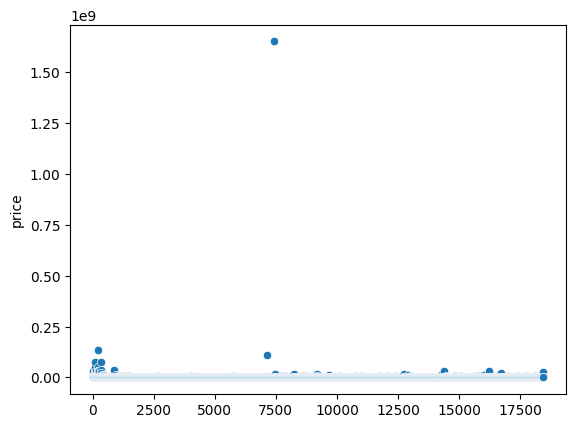

In [38]:
sb.scatterplot(x=df.index, y=df['price'])

Такая большая цена - выброс. От нее нужно избавиться. Дальше стоит посмотреть на соотношение цены и площади

In [39]:
df = df.drop(df[(df.price <= 2e+09) & (df.price >= 1e+08)].index)

<Axes: ylabel='price'>

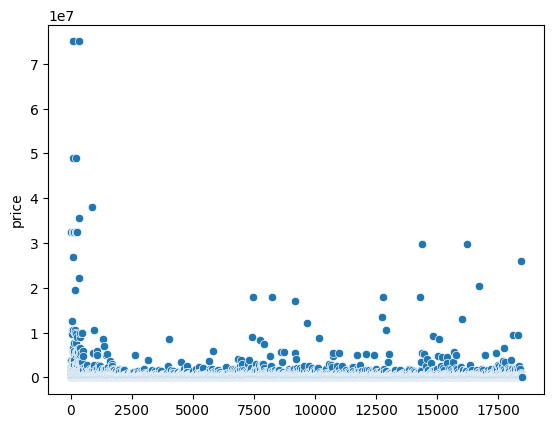

In [40]:
sb.scatterplot(x=df.index, y=df['price'])


Теперь график выглядит куда лучше

А на графике посмотрю на площадь

<Axes: ylabel='size'>

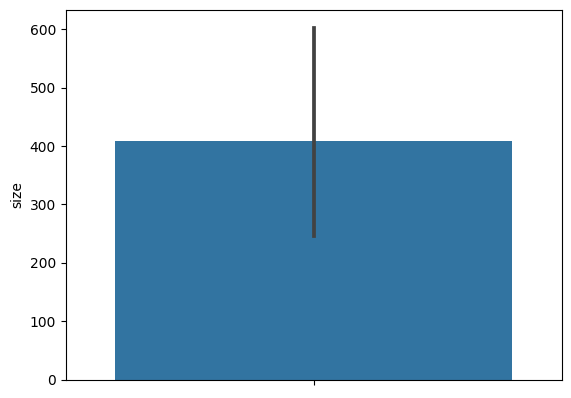

In [41]:
sb.barplot(y=df['size'])

Так ничего не видно

<Axes: ylabel='size'>

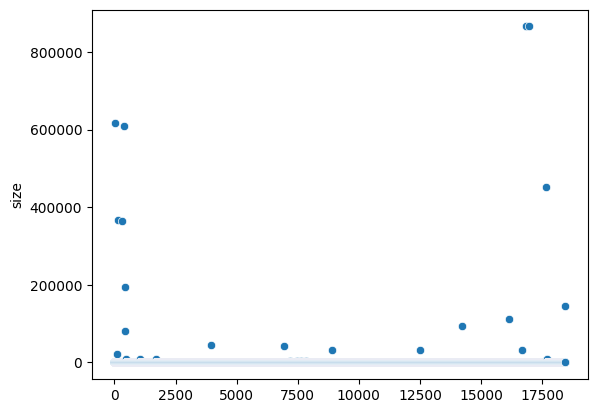

In [42]:
sb.scatterplot(x=df.index, y=df['size'])

Не смотря на большие площади, это не исключение, а просто большое жилье

<Axes: xlabel='size', ylabel='price'>

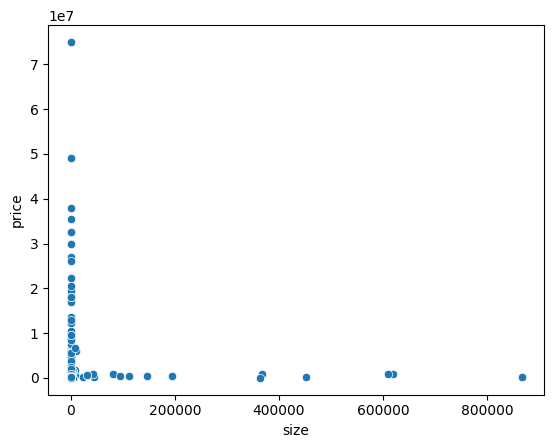

In [43]:
sb.scatterplot(df, x='size', y='price')

Очень слабая зависимость, немного подозрительно это выглядит. Но можно списать на расположение небольших, но дорогих зданий

In [44]:
correlation = df.corr()


<Axes: >

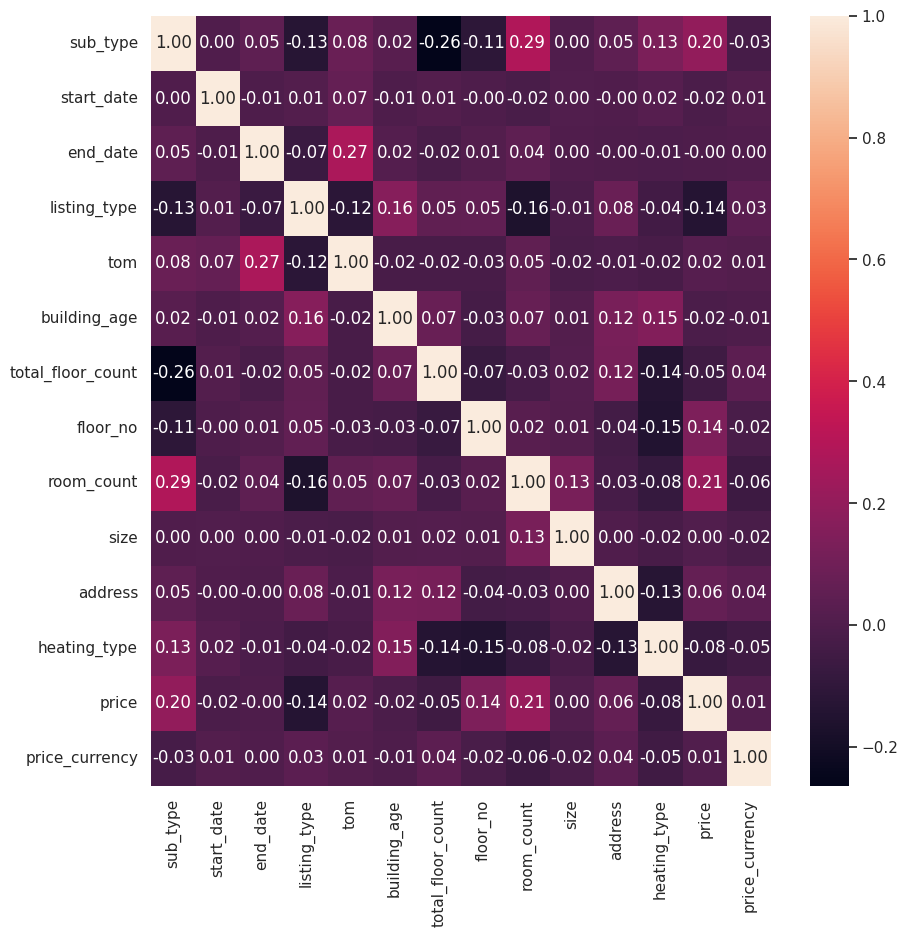

In [45]:
sb.set(rc={'figure.figsize': (10, 10)})
sb.heatmap(correlation, annot=True, fmt='.2f',)

Это выглядит удручающе

Попробую добавить поле стоимости метра и посмотреть на его отношение

In [46]:
df['size_price'] = df.price / df['size']

<Axes: >

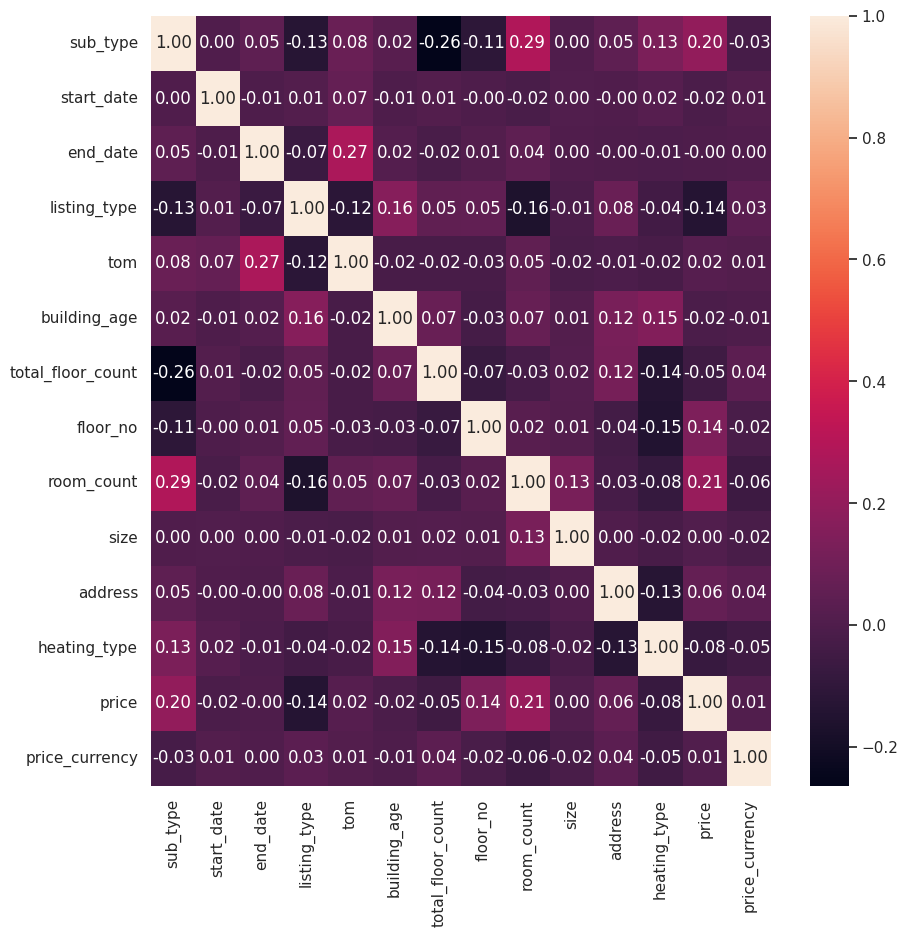

In [47]:
sb.heatmap(correlation, annot=True, fmt='.2f',)

Вообще ничего

Уберу тогда полные нули и около того

In [48]:
MINIMAL_COFF = 0.05

filtered_df = pd.DataFrame()


for column in correlation.columns:
    current_coff = round(correlation[column]['building_age'], 2)
    print(current_coff)
    if abs(current_coff) >= abs(MINIMAL_COFF):
        filtered_df[column] = df[column]

0.02
-0.01
0.02
0.16
-0.02
1.0
0.07
-0.03
0.07
0.01
0.12
0.15
-0.02
-0.01


<Axes: >

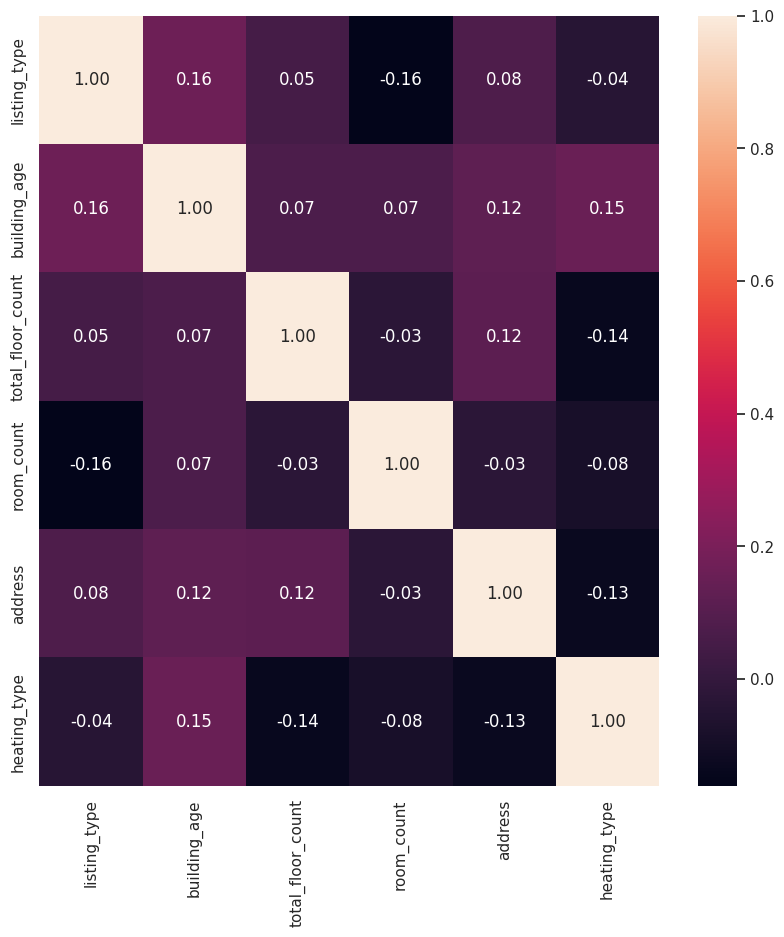

In [49]:
sb.heatmap(filtered_df.corr(), annot=True, fmt='.2f',)


Получилась вот такая выборка

Небогато, но пойдет

## Подготовка для обучения

будет использован мин макс масштабер, так как хочется оставить значения в положительном диапазоне

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
x = filtered_df.drop(columns=['building_age'])
y = filtered_df['building_age']

In [52]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

Перед разбиением нужно посмотреть, как распределена целевая

<Axes: xlabel='count', ylabel='building_age'>

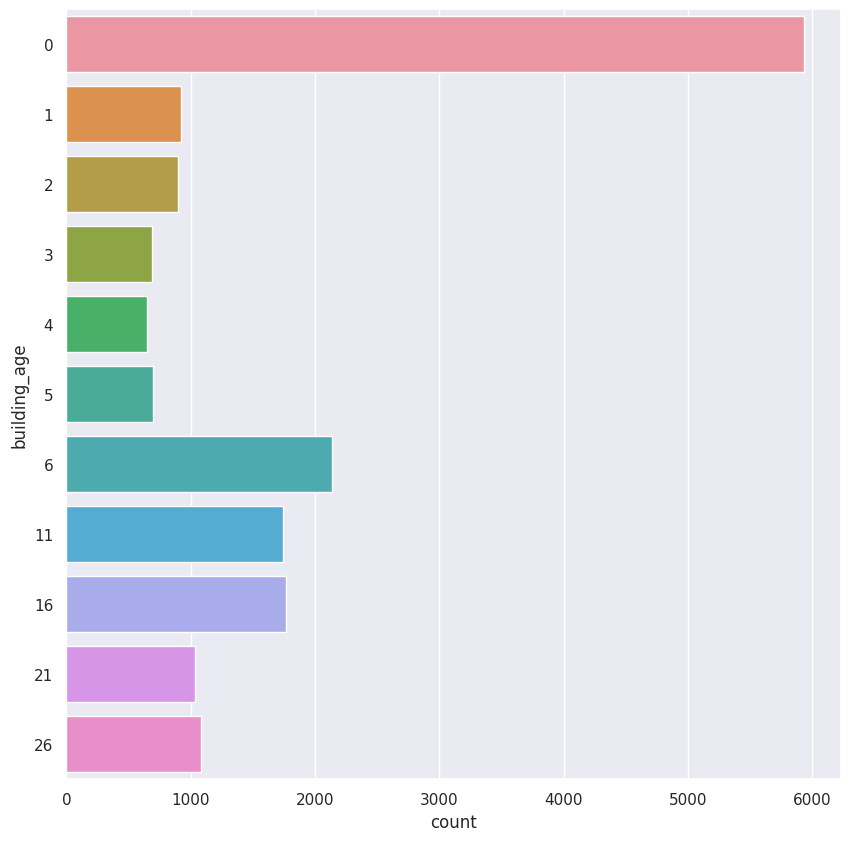

In [53]:
sb.countplot(y=filtered_df.building_age)

Выборка очень несбалансированная

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42)

И сразу сделаем с уменьшенным количество размерности, мало ли понадобиться

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(random_state=42, n_components=2)


x_train_2_dimensions = pca.fit_transform(x_train)
x_test_2_dimensions = pca.fit_transform(x_test)

# Обучение моделей

In [58]:

from sklearn.metrics  import accuracy_score, confusion_matrix,classification_report

In [59]:
scores = pd.DataFrame(columns=['name', 'score'])
results = {}


def learn_and_score(model, name: str,
                    X_train=x_train, X_test=x_test,
                    Y_train=y_train, Y_test=y_test,
                    retrain=False):

    score_slice = scores[scores['name'] == name]

    if len(score_slice) and not retrain:
        predicted = results.get(name)
        score = list(score_slice['score'])[0]
        return score, predicted

    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    results[name] = predicted
    score = accuracy_score(Y_test, predicted)
    scores.loc[len(scores)] = [name, score]
    return score, predicted


def show_model_report(name, Y_test=y_test):
    predicted = results[name]
    score = list(scores[scores['name'] == name]['score'])[0]

    print(f'----{name}----')
    print(f'Model has {score} accuracy score')
    print('===================')
    print(classification_report(Y_test, predicted))
    sb.heatmap(confusion_matrix(Y_test, predicted), annot=True, fmt='.1f')


def show_total_report():
    sb.barplot(scores, x='name', y='score')

## Лес

Так как с корреляциями проблемы, то попробуем лес, он часто справляется

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_forest = RandomForestClassifier(random_state=42)
RANDOM_FOREST_NAME = 'random_forest'

learn_and_score(random_forest, RANDOM_FOREST_NAME)

(0.4888931080311373, array([ 0,  0, 11, ...,  6, 26,  0]))

In [62]:
scores[scores['name'] == RANDOM_FOREST_NAME]['score'][0]

0.4888931080311373

----random_forest----
Model has 0.4888931080311373 accuracy score
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1781
           1       0.36      0.29      0.32       277
           2       0.35      0.32      0.34       270
           3       0.29      0.27      0.28       206
           4       0.37      0.27      0.31       194
           5       0.34      0.29      0.31       209
           6       0.43      0.42      0.42       641
          11       0.39      0.38      0.39       522
          16       0.42      0.39      0.40       531
          21       0.36      0.37      0.37       310
          26       0.49      0.46      0.48       326

    accuracy                           0.49      5267
   macro avg       0.40      0.38      0.39      5267
weighted avg       0.48      0.49      0.48      5267



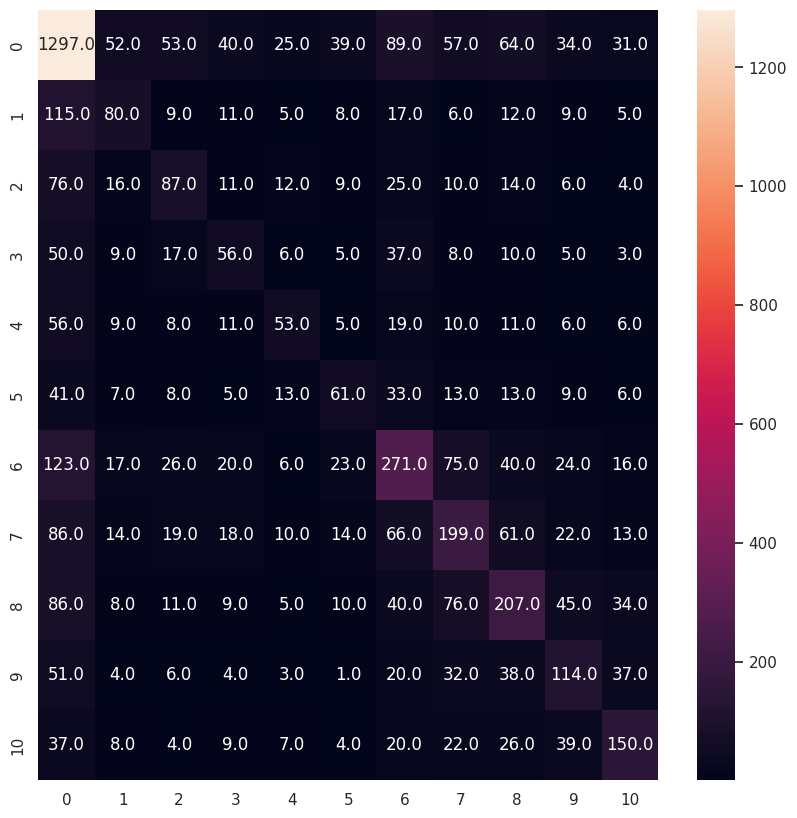

In [63]:
show_model_report(RANDOM_FOREST_NAME)

Грустная картина, но это все еще не пальцем в небо

## Kneighbors

Может хорошо подойти, так как количество измерений не очень велико, а данные отмасштабированы

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
neighbors = KNeighborsClassifier(n_jobs=-1)
NEIGHBORS_NAME = 'neighbors_base'
learn_and_score(neighbors, NEIGHBORS_NAME)

(0.4218720334156066, array([ 0,  0, 26, ...,  6,  6,  1]))

----neighbors_base----
Model has 0.4218720334156066 accuracy score
              precision    recall  f1-score   support

           0       0.53      0.76      0.63      1781
           1       0.22      0.18      0.20       277
           2       0.32      0.22      0.26       270
           3       0.30      0.19      0.24       206
           4       0.26      0.15      0.19       194
           5       0.25      0.13      0.18       209
           6       0.32      0.29      0.31       641
          11       0.36      0.29      0.32       522
          16       0.30      0.24      0.27       531
          21       0.34      0.27      0.30       310
          26       0.42      0.33      0.37       326

    accuracy                           0.42      5267
   macro avg       0.33      0.28      0.29      5267
weighted avg       0.39      0.42      0.39      5267



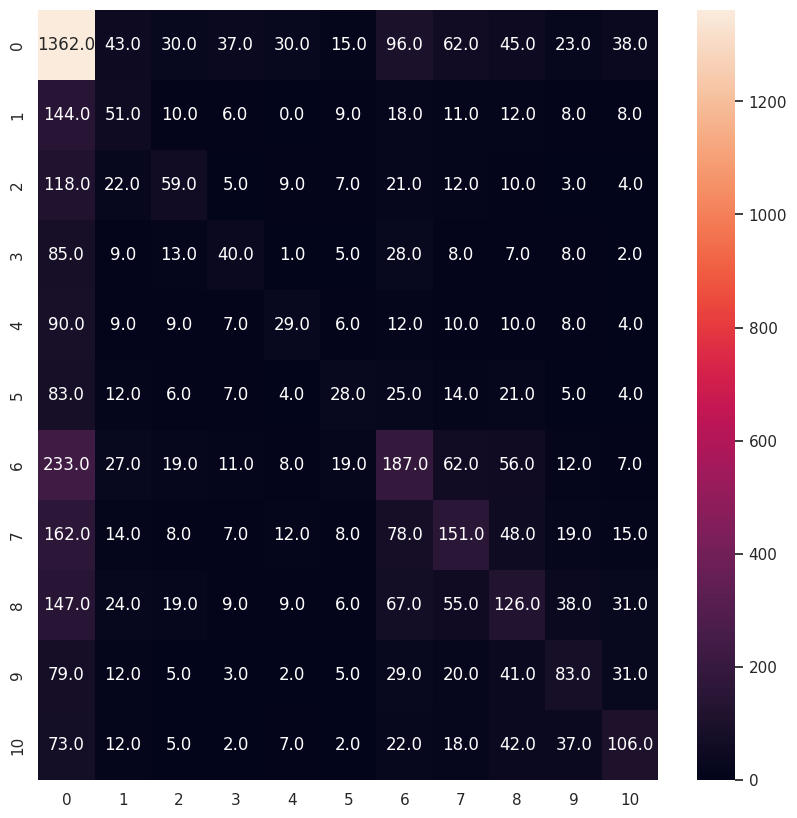

In [66]:
show_model_report(NEIGHBORS_NAME)

Еще хуже показали себя, это довольно досадно

## Линейная модель

In [67]:
from sklearn.linear_model import SGDClassifier

In [68]:
sgd = SGDClassifier(random_state=42, loss='log_loss')
SGD_NAME = 'SGD_base'
learn_and_score(sgd, SGD_NAME, retrain=True)

(0.3453578887412189, array([0, 0, 0, ..., 0, 0, 0]))

----SGD_base----
Model has 0.3453578887412189 accuracy score
              precision    recall  f1-score   support

           0       0.36      0.97      0.53      1781
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00       270
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00       209
           6       0.00      0.00      0.00       641
          11       0.17      0.09      0.12       522
          16       0.00      0.00      0.00       531
          21       0.00      0.00      0.00       310
          26       0.23      0.11      0.15       326

    accuracy                           0.35      5267
   macro avg       0.07      0.11      0.07      5267
weighted avg       0.15      0.35      0.20      5267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


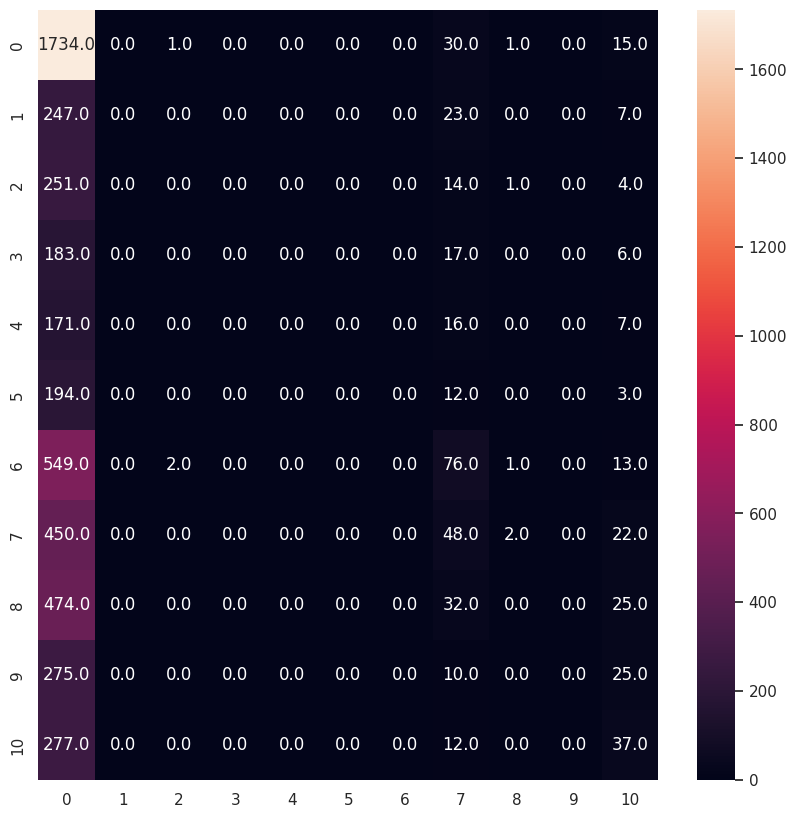

In [69]:
show_model_report(SGD_NAME)

Нуу, не очень получается, пока что хуже всего 

## Градиентный бустинг

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
boosting = GradientBoostingClassifier(random_state=42)
BOOSTING_NAME = 'boosting_base'
learn_and_score(boosting, BOOSTING_NAME)

(0.4321245490791722, array([ 0,  0,  0, ...,  6, 26,  0]))

----boosting_base----
Model has 0.4321245490791722 accuracy score
              precision    recall  f1-score   support

           0       0.45      0.92      0.60      1781
           1       0.41      0.10      0.16       277
           2       0.54      0.13      0.20       270
           3       0.50      0.06      0.10       206
           4       0.32      0.04      0.07       194
           5       0.35      0.09      0.14       209
           6       0.35      0.21      0.26       641
          11       0.42      0.19      0.26       522
          16       0.28      0.18      0.22       531
          21       0.48      0.20      0.28       310
          26       0.49      0.45      0.47       326

    accuracy                           0.43      5267
   macro avg       0.42      0.23      0.25      5267
weighted avg       0.42      0.43      0.36      5267



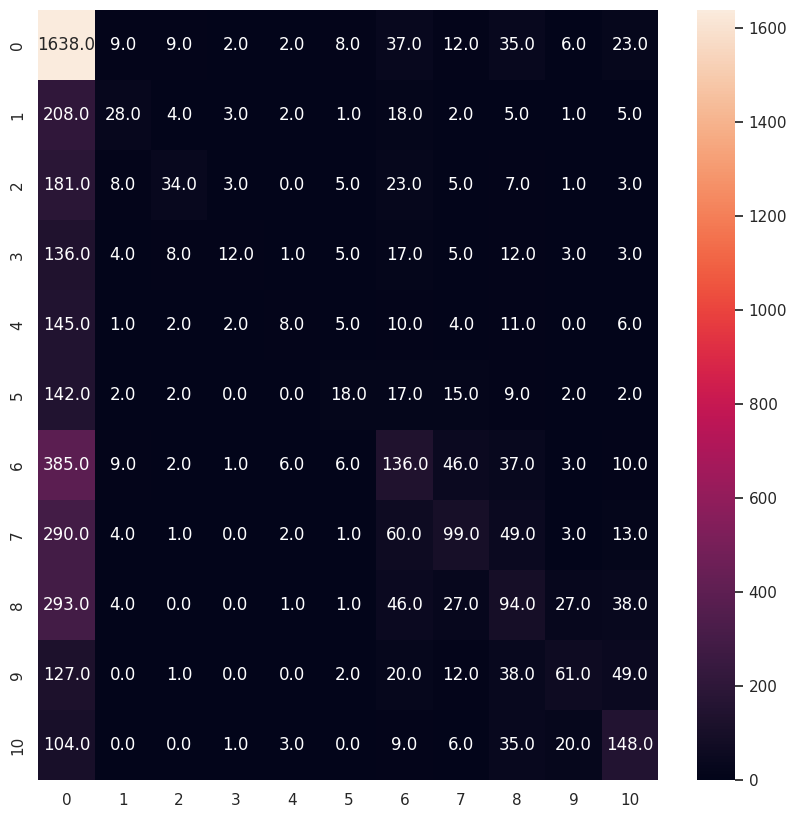

In [72]:
show_model_report(BOOSTING_NAME)

## Наивный Баес. Разные

Пишут, что хорошо подходит для несбалансированных наборов данных

In [73]:
from sklearn.naive_bayes import ComplementNB

In [74]:
bayes = ComplementNB()
COMPLEMENT_BAYES_NAME = 'complement_bayes_base'
learn_and_score(bayes, COMPLEMENT_BAYES_NAME, retrain=True)

(0.33719384849060186, array([ 0,  0,  2, ..., 11,  2, 11]))

----complement_bayes_base----
Model has 0.33719384849060186 accuracy score
              precision    recall  f1-score   support

           0       0.42      0.86      0.56      1781
           1       0.00      0.00      0.00       277
           2       0.05      0.08      0.06       270
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00       209
           6       0.21      0.11      0.14       641
          11       0.17      0.18      0.17       522
          16       0.19      0.02      0.03       531
          21       0.00      0.00      0.00       310
          26       0.16      0.13      0.14       326

    accuracy                           0.34      5267
   macro avg       0.11      0.13      0.10      5267
weighted avg       0.22      0.34      0.24      5267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


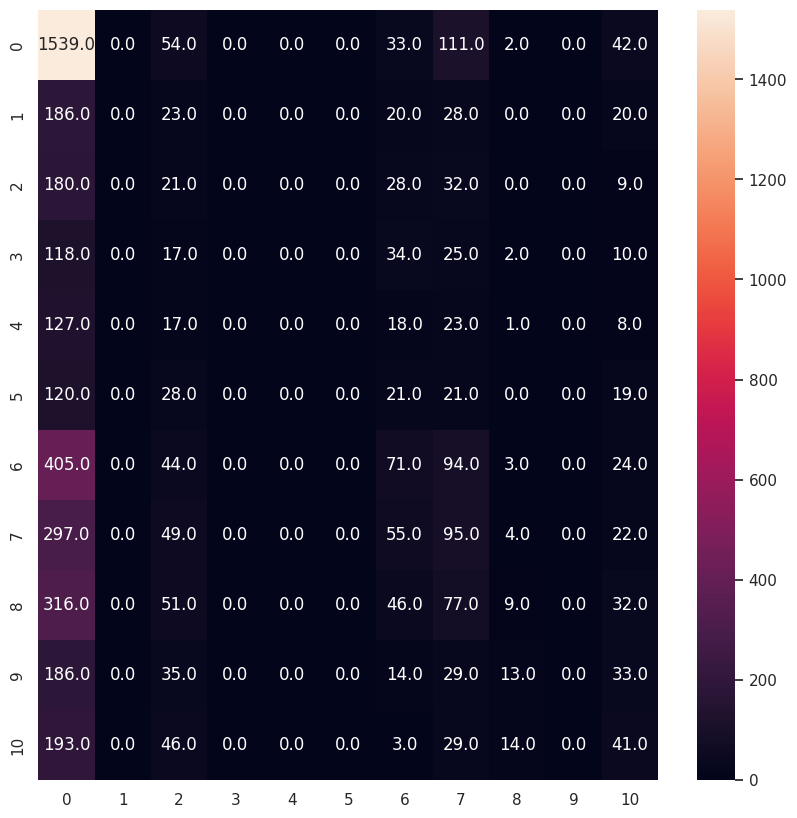

In [75]:
show_model_report(COMPLEMENT_BAYES_NAME)


Все печальнее и печальнее

Почему то плохо сработал с данными

In [76]:
from sklearn.naive_bayes import BernoulliNB

In [77]:
bayes = BernoulliNB()
BERNOULLI_BAYES_NAME = 'bernolli_bayes_base'
learn_and_score(bayes, BERNOULLI_BAYES_NAME, retrain=True)

(0.3370039870894247, array([0, 0, 0, ..., 0, 0, 0]))

----bernolli_bayes_base----
Model has 0.3370039870894247 accuracy score
              precision    recall  f1-score   support

           0       0.34      0.99      0.51      1781
           1       0.14      0.01      0.01       277
           2       0.00      0.00      0.00       270
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00       209
           6       0.00      0.00      0.00       641
          11       0.10      0.01      0.01       522
          16       0.00      0.00      0.00       531
          21       0.00      0.00      0.00       310
          26       0.09      0.01      0.01       326

    accuracy                           0.34      5267
   macro avg       0.06      0.09      0.05      5267
weighted avg       0.14      0.34      0.17      5267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


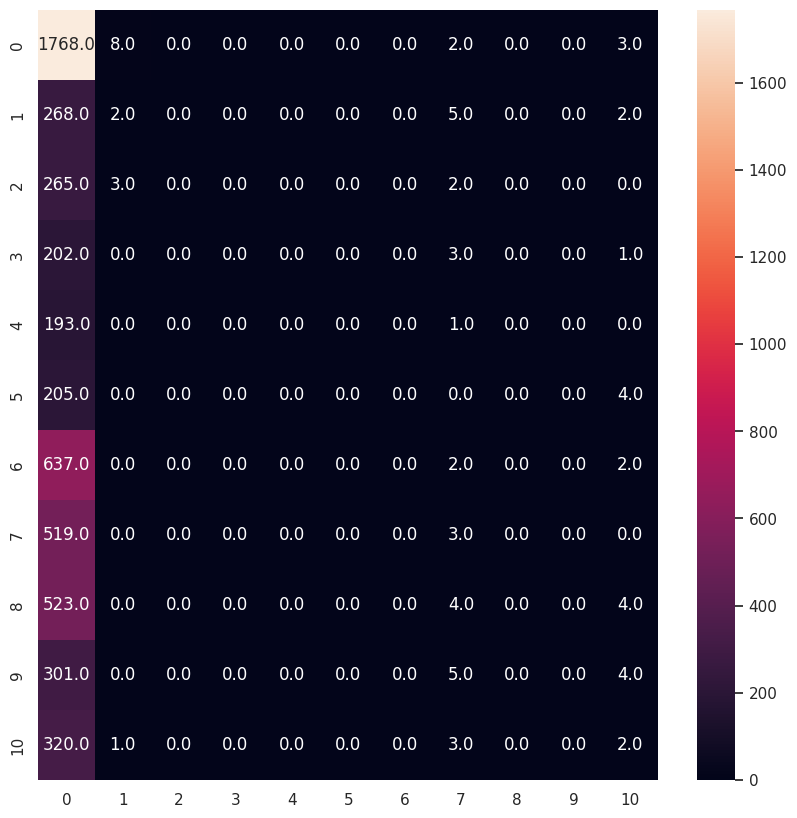

In [78]:
show_model_report(BERNOULLI_BAYES_NAME)


Несколько лучше, но все равно очень плохо

In [79]:
from sklearn.naive_bayes import CategoricalNB

In [80]:
bayes = CategoricalNB()
CATEGORICAL_BAYES_NAME = 'bernolli_bayes_base'
learn_and_score(bayes, CATEGORICAL_BAYES_NAME, retrain=True)

(0.3390924625023733, array([0, 0, 0, ..., 0, 0, 0]))

----bernolli_bayes_base----
Model has 0.3370039870894247 accuracy score
              precision    recall  f1-score   support

           0       0.34      1.00      0.51      1781
           1       1.00      0.00      0.01       277
           2       0.14      0.03      0.05       270
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00       209
           6       0.20      0.00      0.00       641
          11       0.00      0.00      0.00       522
          16       0.00      0.00      0.00       531
          21       0.00      0.00      0.00       310
          26       0.00      0.00      0.00       326

    accuracy                           0.34      5267
   macro avg       0.15      0.09      0.05      5267
weighted avg       0.20      0.34      0.18      5267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


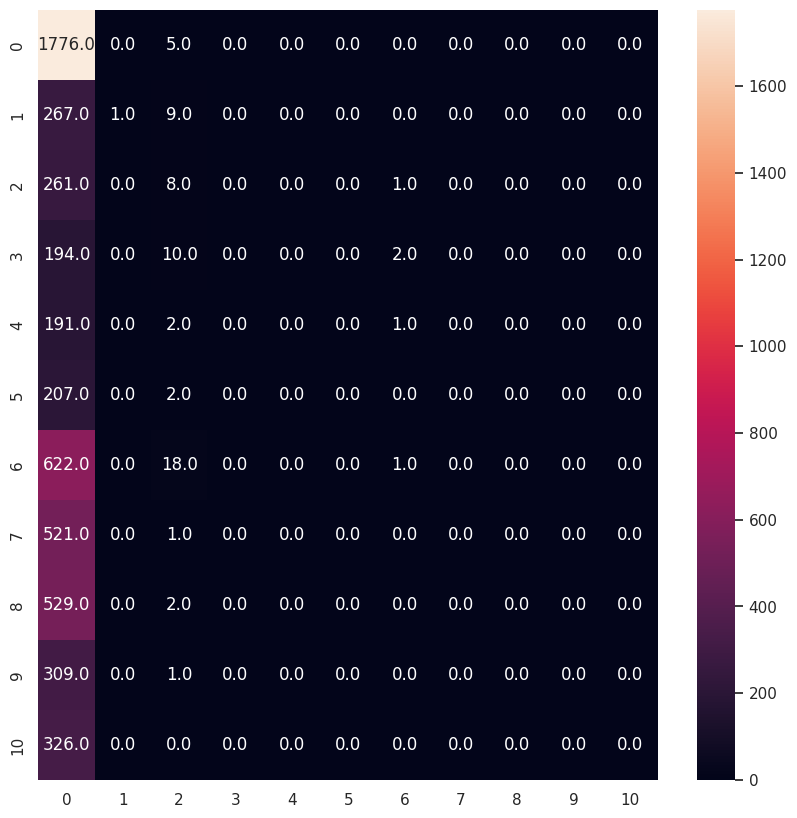

In [81]:
show_model_report(CATEGORICAL_BAYES_NAME)


## Дерево решений

Одна из последних надежд, получить точность более 60 процентов

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
tree = DecisionTreeClassifier(random_state=42)
TREE_NAME = 'tree_base'

learn_and_score(tree, TREE_NAME)

(0.4849060186064173, array([ 0,  0, 16, ...,  6, 26,  0]))

----tree_base----
Model has 0.4849060186064173 accuracy score
              precision    recall  f1-score   support

           0       0.65      0.73      0.68      1781
           1       0.33      0.31      0.32       277
           2       0.32      0.30      0.31       270
           3       0.31      0.28      0.29       206
           4       0.34      0.28      0.31       194
           5       0.29      0.27      0.28       209
           6       0.41      0.39      0.40       641
          11       0.40      0.38      0.39       522
          16       0.43      0.39      0.41       531
          21       0.39      0.34      0.36       310
          26       0.47      0.49      0.48       326

    accuracy                           0.48      5267
   macro avg       0.39      0.38      0.39      5267
weighted avg       0.47      0.48      0.48      5267



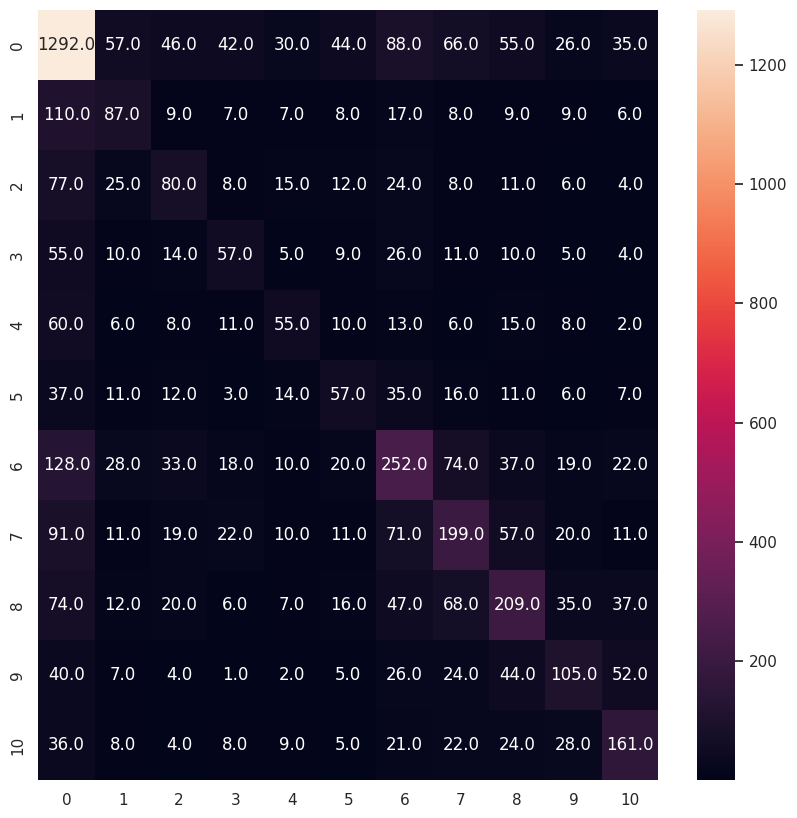

In [84]:
show_model_report(TREE_NAME)

А получилось очень даже неплохо, с этим можно работать

## Кошачий бустинг

Посоветовали, говорят, что быстро и хорошо работает. Но у меня есть сомнения

In [86]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


In [87]:
catboost = CatBoostClassifier(random_state=42, random_strength=42,iterations=1000)
CATBOOST_NAME = 'catboost'
learn_and_score(catboost, CATBOOST_NAME)

Learning rate set to 0.089927
0:	learn: 2.3177832	total: 146ms	remaining: 2m 25s
1:	learn: 2.2621110	total: 214ms	remaining: 1m 46s
2:	learn: 2.2236692	total: 245ms	remaining: 1m 21s
3:	learn: 2.1847056	total: 278ms	remaining: 1m 9s
4:	learn: 2.1531792	total: 315ms	remaining: 1m 2s
5:	learn: 2.1288898	total: 351ms	remaining: 58.1s
6:	learn: 2.1069356	total: 395ms	remaining: 56s
7:	learn: 2.0927912	total: 437ms	remaining: 54.2s
8:	learn: 2.0780120	total: 490ms	remaining: 54s
9:	learn: 2.0653694	total: 535ms	remaining: 53s
10:	learn: 2.0564473	total: 578ms	remaining: 52s
11:	learn: 2.0456101	total: 654ms	remaining: 53.8s
12:	learn: 2.0380247	total: 747ms	remaining: 56.7s
13:	learn: 2.0312229	total: 795ms	remaining: 56s
14:	learn: 2.0234977	total: 873ms	remaining: 57.3s
15:	learn: 2.0199248	total: 907ms	remaining: 55.8s
16:	learn: 2.0160000	total: 971ms	remaining: 56.1s
17:	learn: 2.0130001	total: 1.02s	remaining: 55.9s
18:	learn: 2.0087417	total: 1.1s	remaining: 56.8s
19:	learn: 2.004836

(0.450730966394532,
 array([[ 0],
        [ 6],
        [16],
        ...,
        [ 6],
        [26],
        [ 0]]))

----catboost----
Model has 0.450730966394532 accuracy score
              precision    recall  f1-score   support

           0       0.50      0.88      0.64      1781
           1       0.43      0.13      0.20       277
           2       0.50      0.19      0.27       270
           3       0.54      0.14      0.22       206
           4       0.44      0.12      0.19       194
           5       0.40      0.09      0.15       209
           6       0.34      0.28      0.31       641
          11       0.35      0.28      0.31       522
          16       0.30      0.20      0.24       531
          21       0.38      0.22      0.28       310
          26       0.47      0.45      0.46       326

    accuracy                           0.45      5267
   macro avg       0.42      0.27      0.30      5267
weighted avg       0.43      0.45      0.40      5267



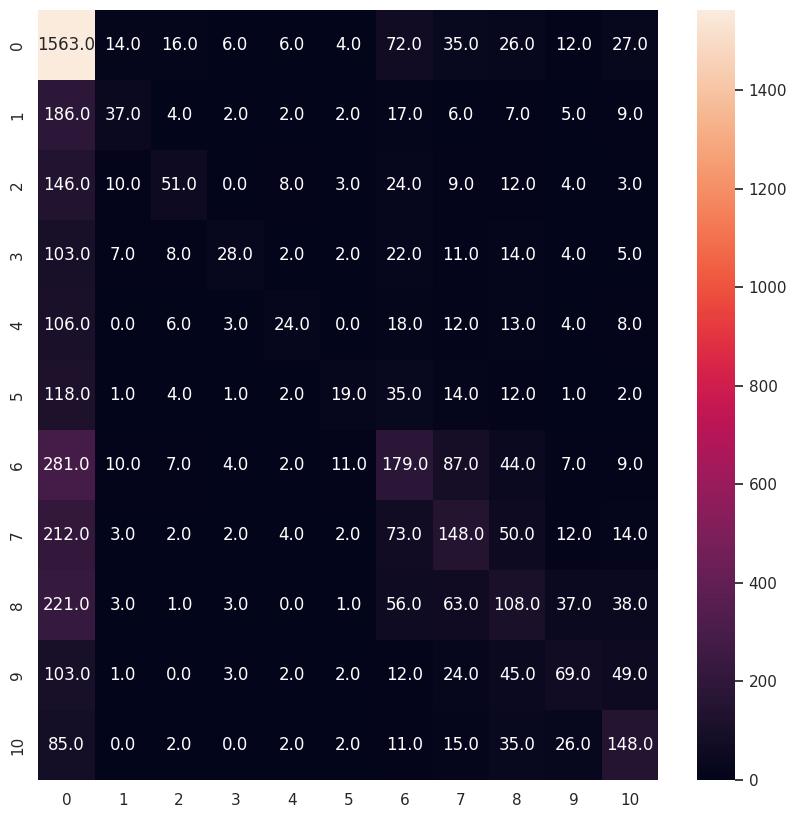

In [88]:
show_model_report(CATBOOST_NAME)

К сожалению, модель показала себя не очень хорошо. Дерево справилось лучше

# Промежуточные итоги

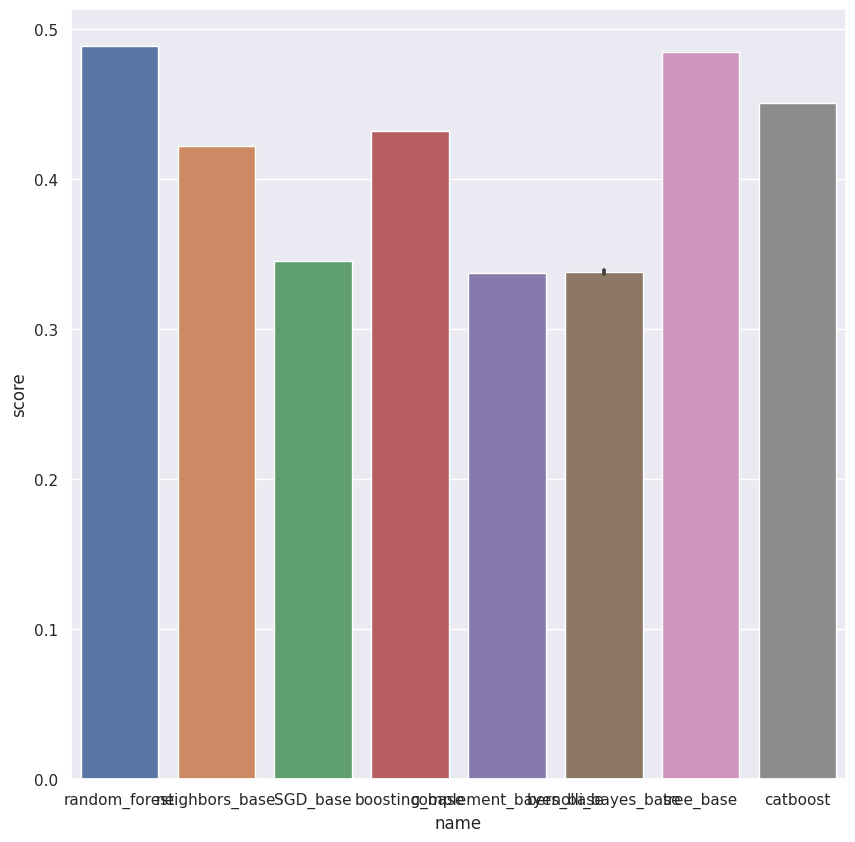

In [89]:
show_total_report()

Лучше всего себя, на удивление, показало дерево и лес. Так же неплохо сработали соседи

Теперь попробую подобрать гиперпараметры для дерева и соседей. Для леса не буду, потому что он работает на основе дерева

# Гиперпараметры

In [90]:
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV

In [91]:
def randomized_search(model, params):
    randomized = RandomizedSearchCV(
        model, params, cv=10, n_jobs=-1, random_state=42,
        return_train_score=True)

    randomized.fit(x_train, y_train)

    result = pd.DataFrame(randomized.cv_results_).sort_values(
        'mean_test_score', ascending=False)

    return result, randomized

Вспомогательная функция для случайного поиска параметров

In [92]:
def grid_search(model, params):
    grid = GridSearchCV(
        model, params, cv=10, n_jobs=-1, 
        return_train_score=True)

    grid.fit(x_train, y_train)

    return grid.best_params_, grid

Вспомогательная функция для точного поиска параметров

In [93]:
IN_ROW = 3


def show_results(df: pd.DataFrame, in_row=IN_ROW):
    filtered_columns = list(filter(
        lambda column: column.startswith('param_'), df.columns))
    print(filtered_columns)
    column_count = m.ceil(len(filtered_columns) / in_row)

    fig, axs = mpl.subplots(ncols=in_row, nrows=column_count)
    sb.set(style='whitegrid', color_codes=True)
    fig.set_size_inches(30, 25)

    for index, column in enumerate(filtered_columns):
        row = index // in_row
        col = index  % in_row
        sb.barplot(x=column, y='mean_test_score', data=df,
                   ax=axs[row, col])
    mpl.show()
    

Вспомогательная функция для отображения результатов по параметрам

## Дерево

Для начала сделаем быстрый примерный перебор, чтобы потом сделать только улучшающие

In [94]:
tree_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [*np.arange(1, 10, 1), None],
    'min_samples_split':np.arange(2, 25, 2),
    'min_samples_leaf': np.arange(1, 25, 2),
    'max_features': [ 'sqrt', 'log2']
}

In [95]:
base_tree = DecisionTreeClassifier(random_state=42)
base_tree_result, base_tree_randomized = randomized_search(
    base_tree, tree_params)

['param_splitter', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_criterion']


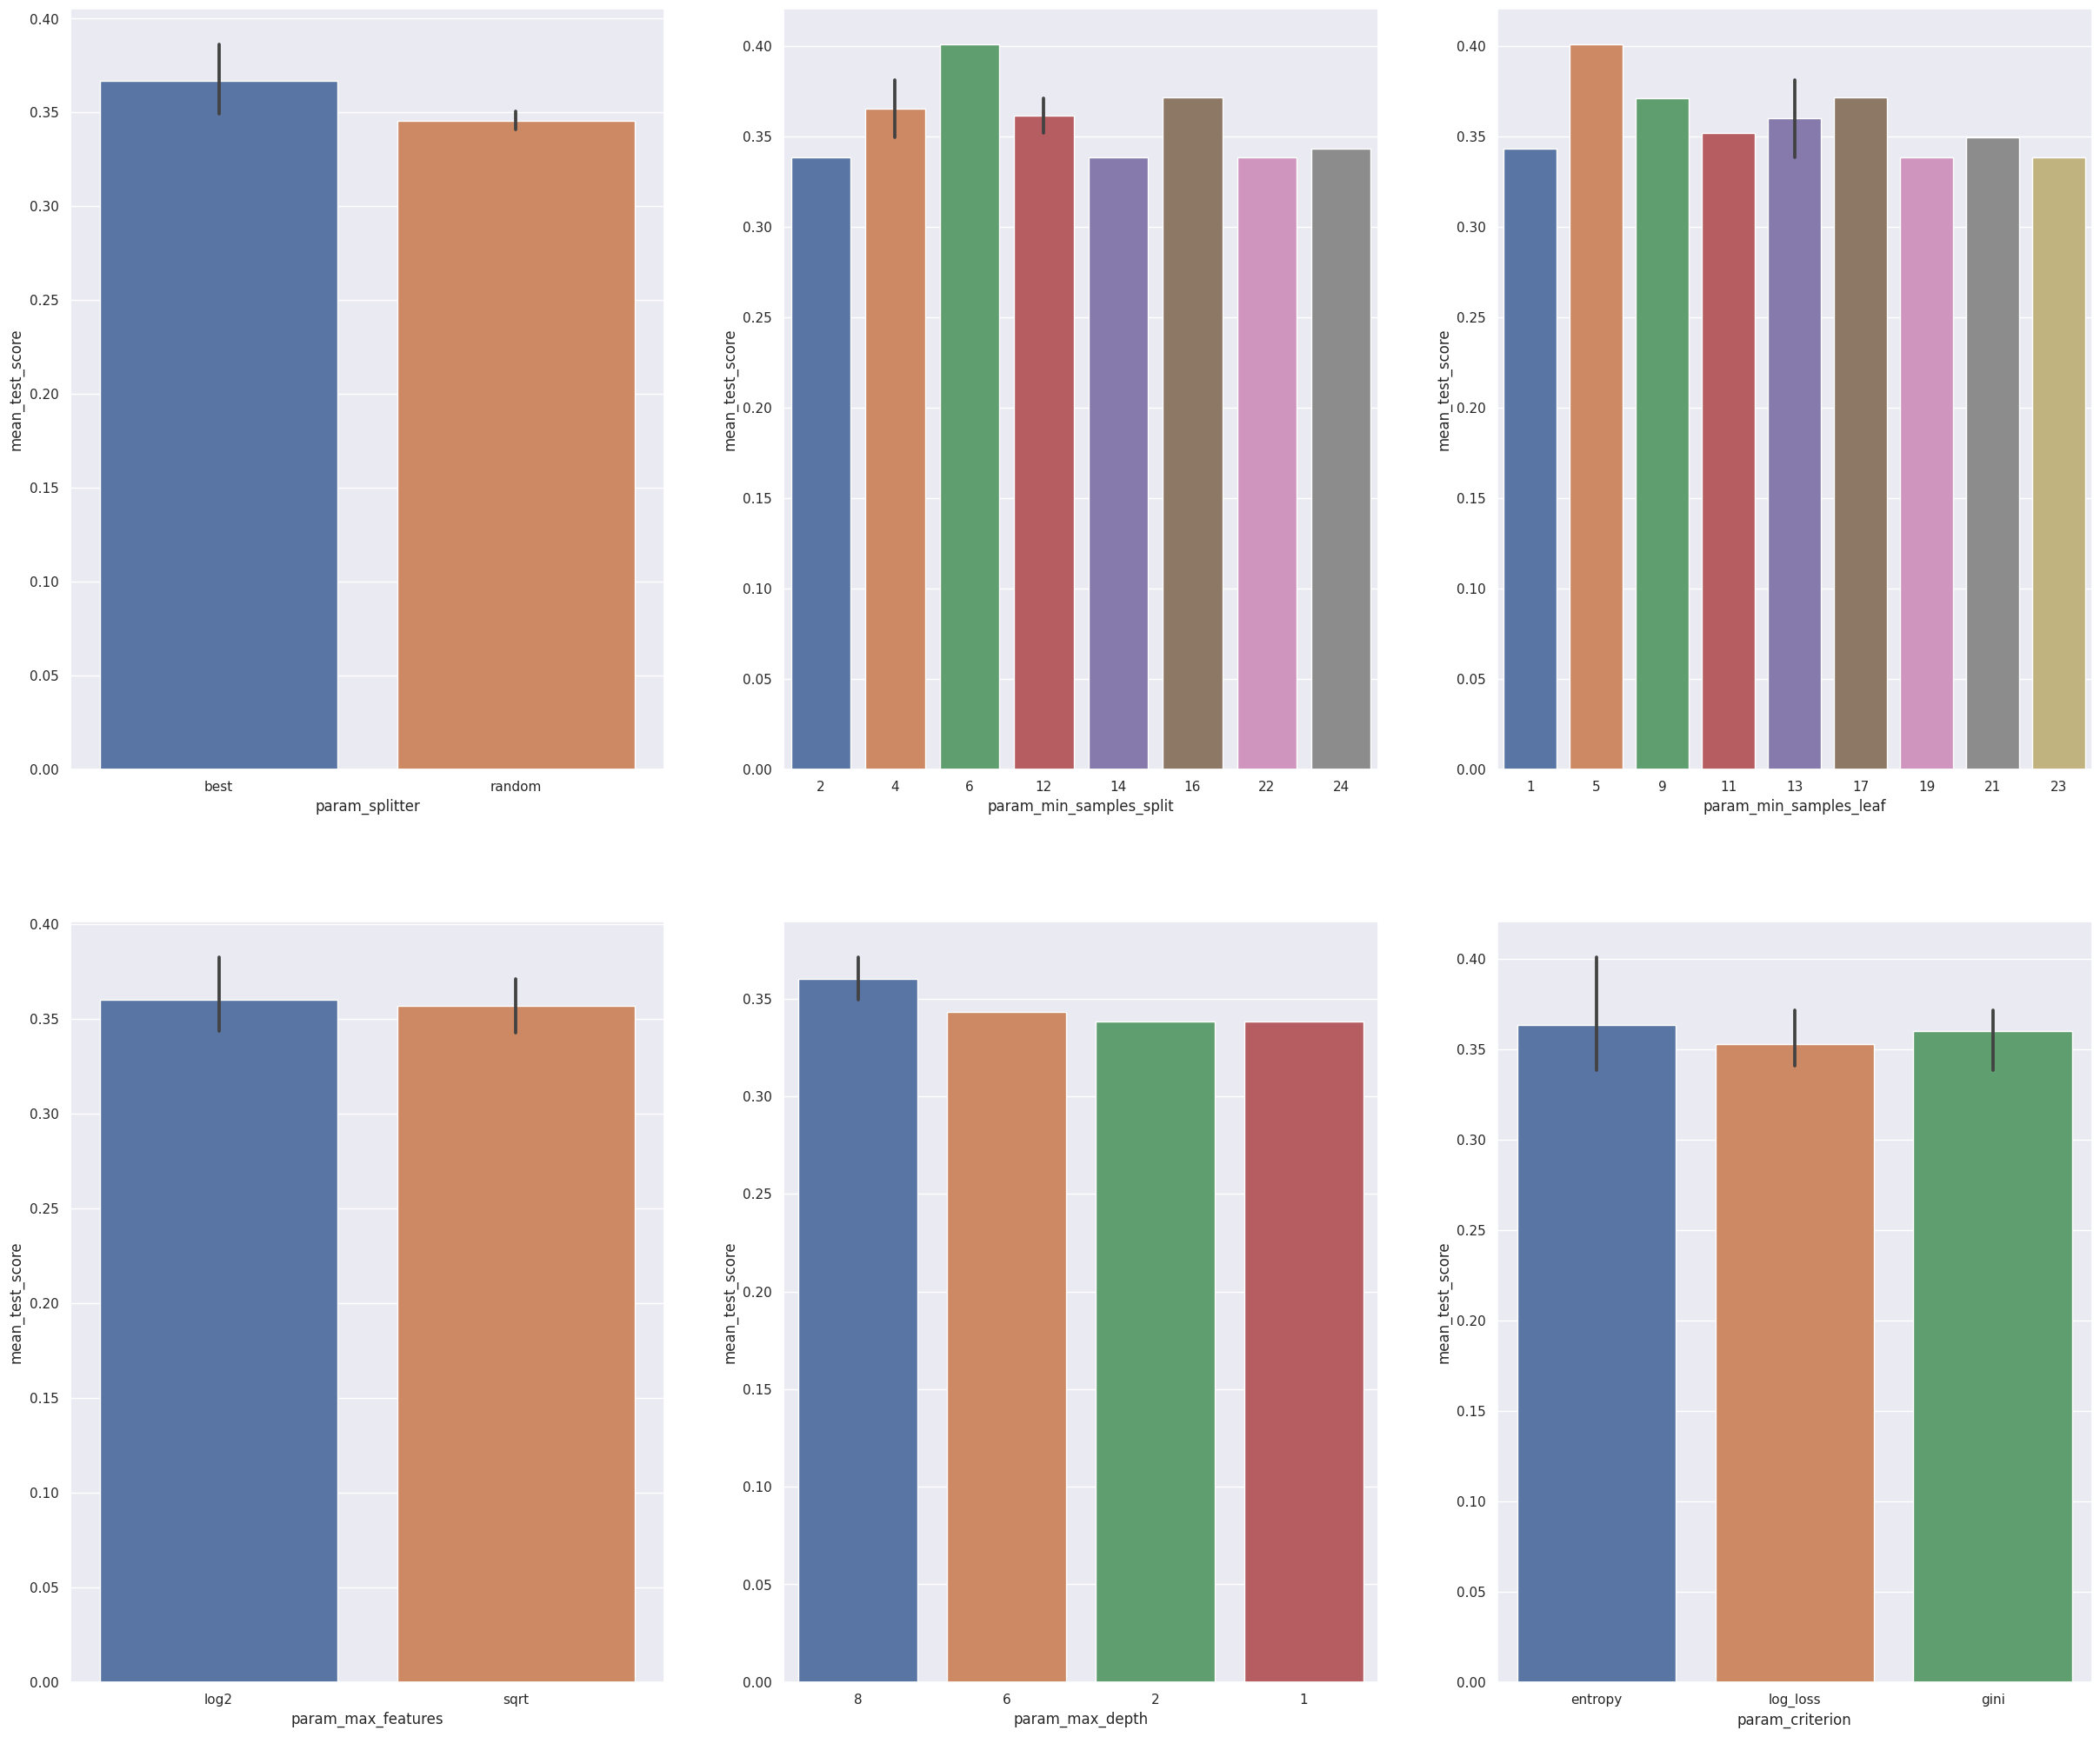

In [96]:
show_results(base_tree_result)

Можно точно сказать, что:
- max_features можно использовать любой
- criterion лучше взять entropy
- splitter лучше best

Нужно еще будет попробовать:
- max_depth between 2 and 8
- min_samples_split between 4 and 12
- min_samples_leaf between 1 and 12

In [97]:
prebest_tree_params = {
    'max_features': 'log2',
    'criterion': 'entropy',
    'splitter': 'best'
}

prebest_params = {
    'max_depth': np.arange(2, 8, 1),
    'min_samples_split': np.arange(4, 12, 1),
    'min_samples_leaf': np.arange(1, 12, 1)
}

In [98]:
prebest_tree = DecisionTreeClassifier(random_state=42, **prebest_tree_params)

best_tree_params, prebest_tree_grid = grid_search(
    prebest_tree, prebest_params)

Отлично, теперь обучим модель со всеми параметрами и внесем ее в наш каталог

In [99]:
best_tree = DecisionTreeClassifier(random_state=42, **prebest_tree_params, **best_tree_params)
BEST_TREE_NAME ='best_tree_name'
learn_and_score(best_tree, BEST_TREE_NAME)

(0.3632048604518701, array([ 0,  0,  0, ...,  6, 26,  0]))

----best_tree_name----
Model has 0.3632048604518701 accuracy score
              precision    recall  f1-score   support

           0       0.41      0.91      0.56      1781
           1       0.20      0.03      0.04       277
           2       0.33      0.06      0.11       270
           3       0.58      0.03      0.06       206
           4       0.60      0.05      0.09       194
           5       0.33      0.00      0.01       209
           6       0.23      0.10      0.14       641
          11       0.20      0.12      0.15       522
          16       0.15      0.06      0.09       531
          21       0.33      0.15      0.21       310
          26       0.21      0.15      0.17       326

    accuracy                           0.36      5267
   macro avg       0.32      0.15      0.15      5267
weighted avg       0.32      0.36      0.27      5267



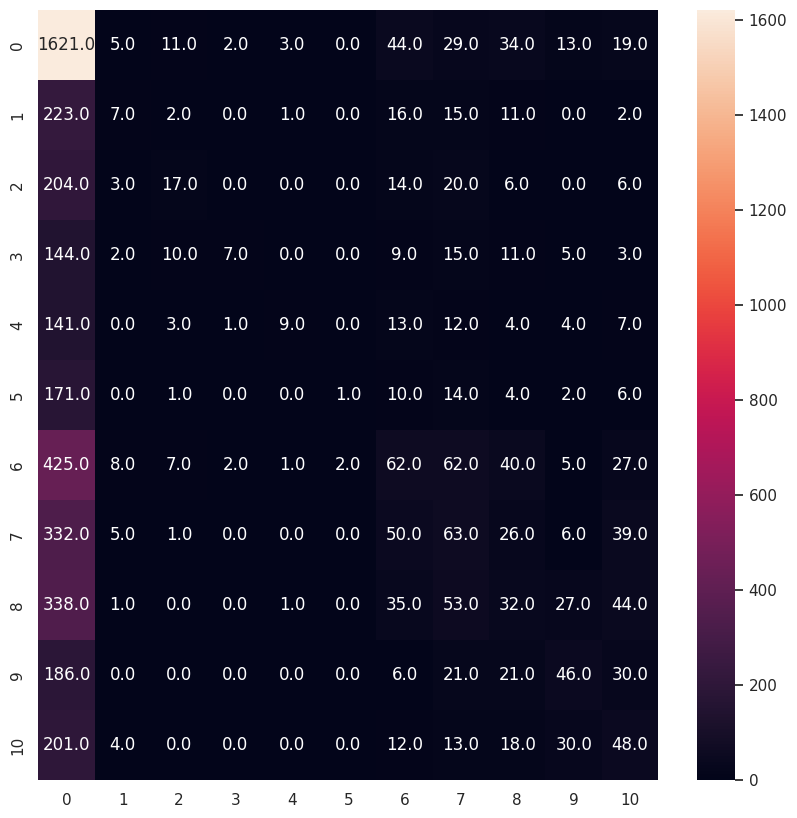

In [100]:
show_model_report(BEST_TREE_NAME)

Модель, почему то, ухудшила свою точность. Очень странно. Значит параметры стандартные наиболее подходящие

## Соседи

Для начала сделаем поверхностный анализ параметров

In [101]:
base_params = {
    'n_neighbors': np.arange(1, 15, 1),
    'weights': ['uniform', 'distance', None],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(5, 80, 5)
}


In [102]:
base_neighbor = KNeighborsClassifier(n_jobs=-1)
base_neighbor_result, base_neighbor_randomized = randomized_search(base_neighbor, base_params)

['param_weights', 'param_n_neighbors', 'param_leaf_size', 'param_algorithm']


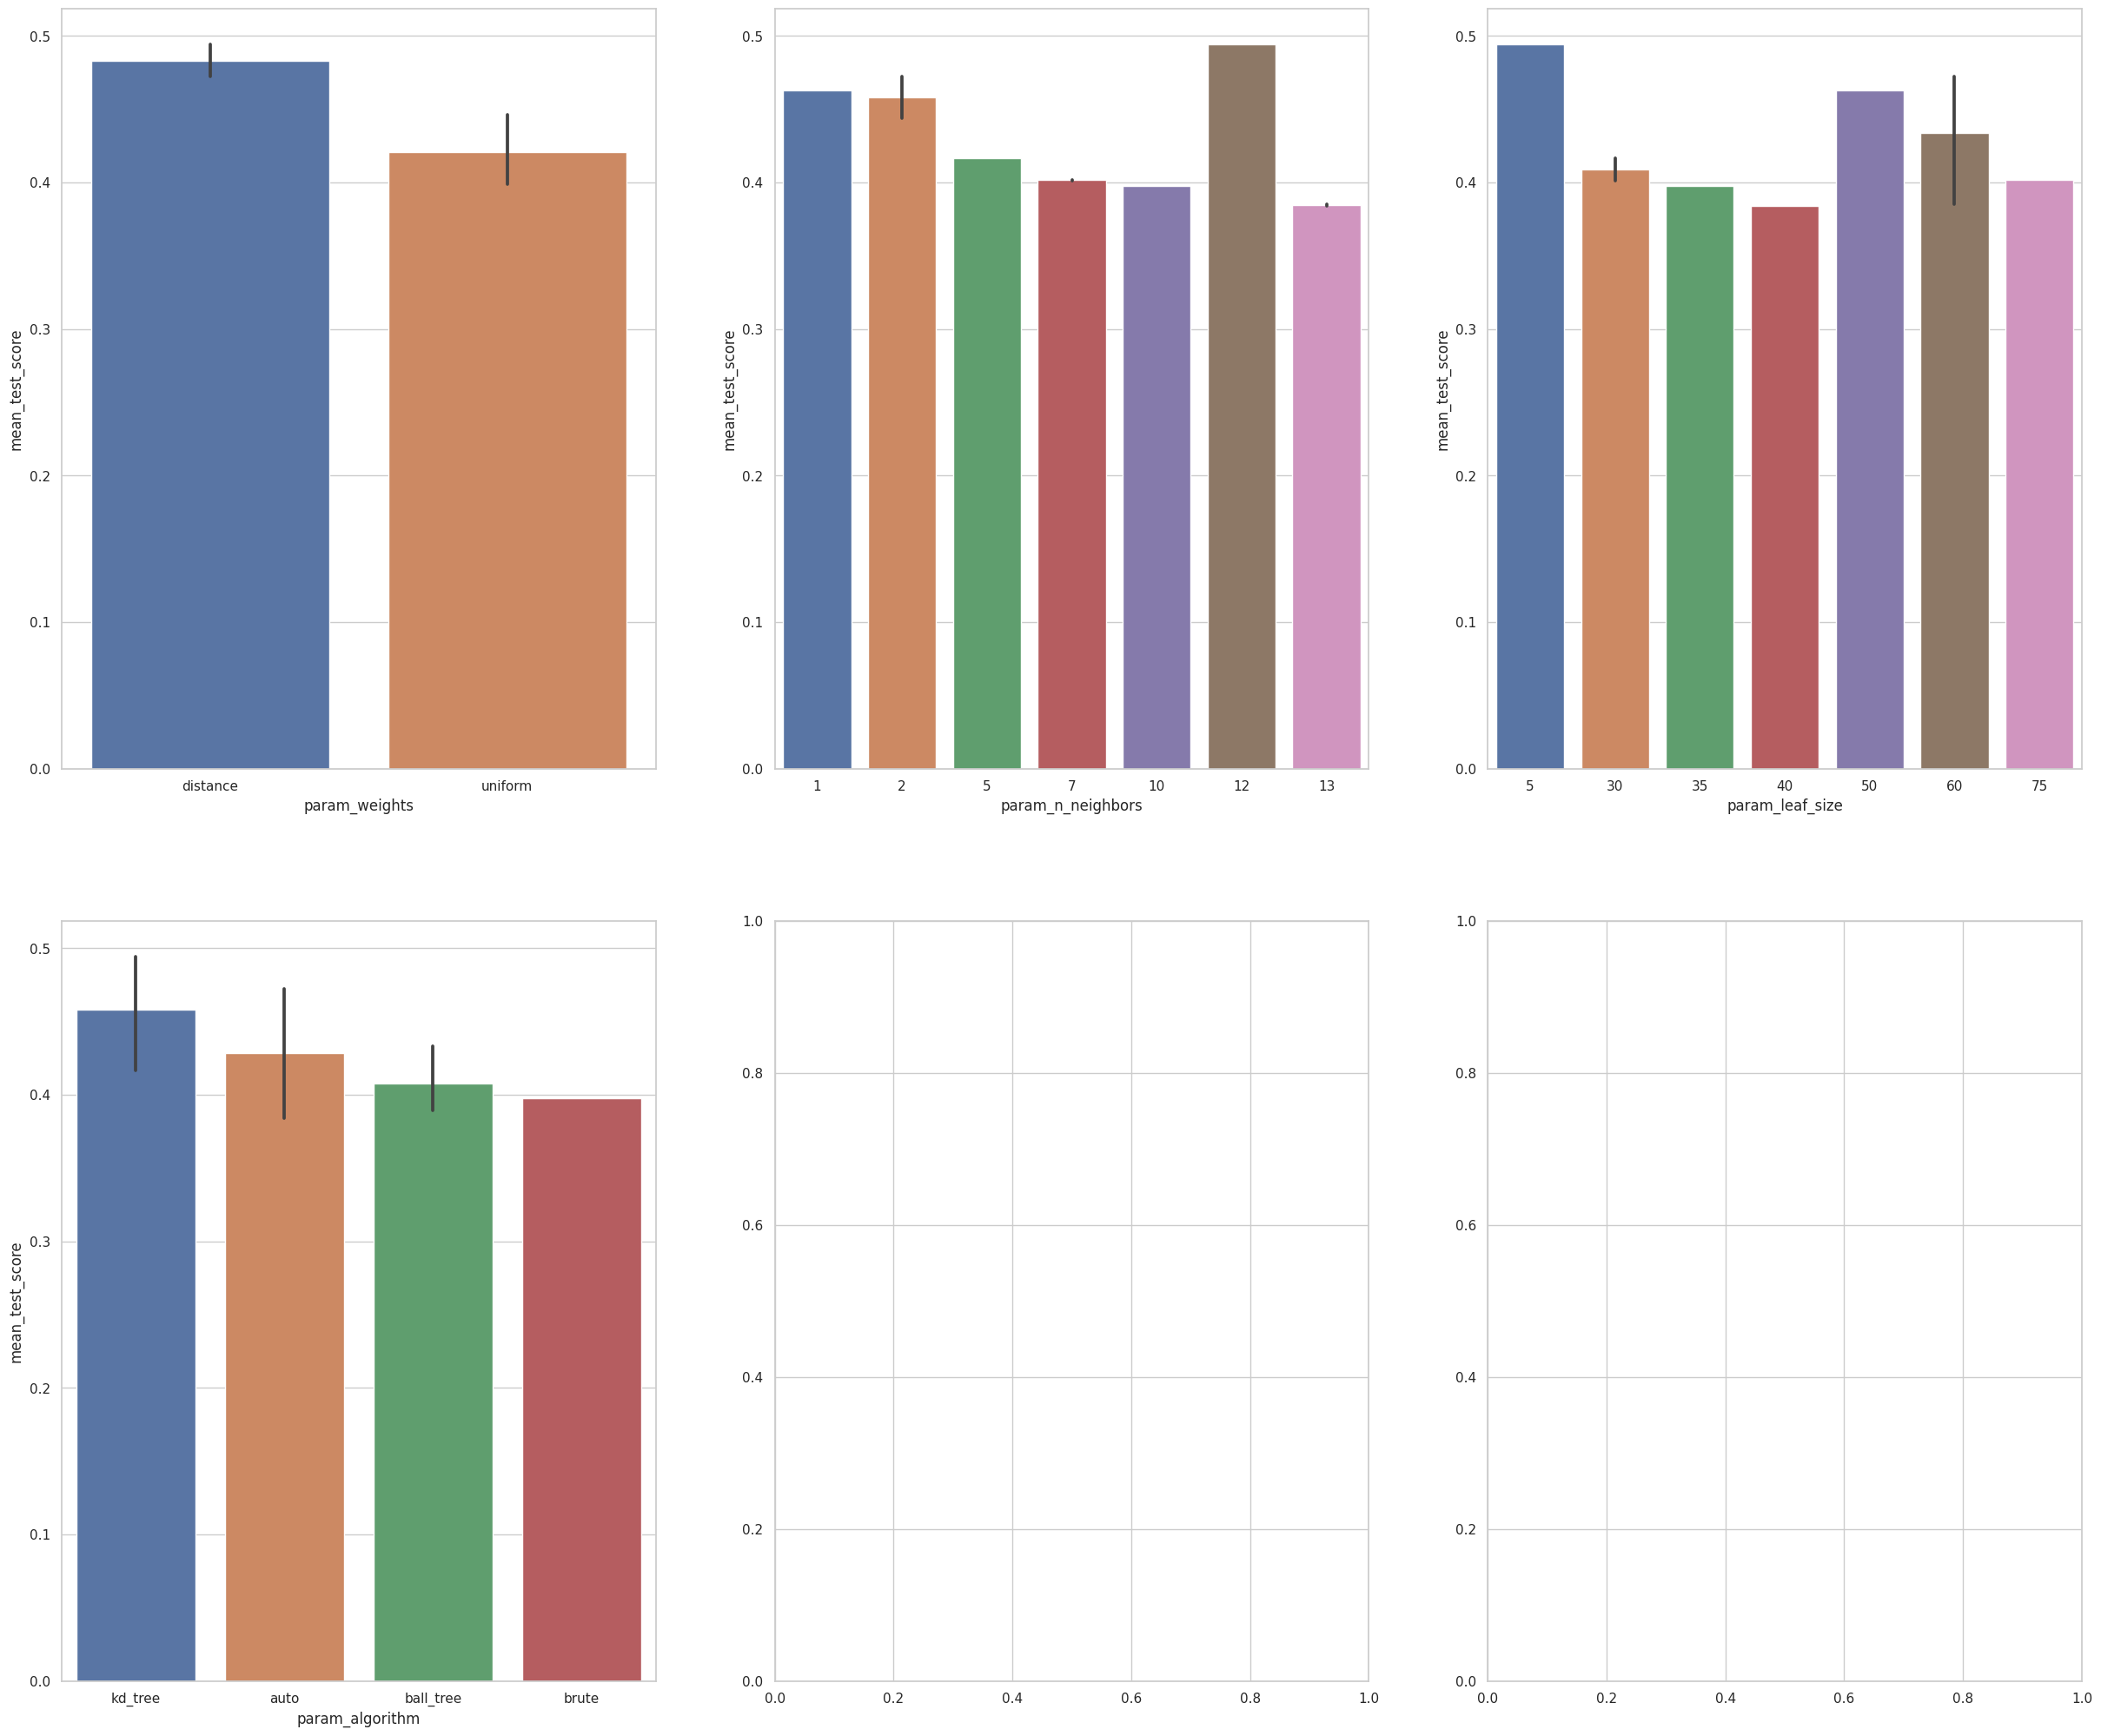

In [103]:
show_results(base_neighbor_result,in_roow=2)

Можно точно сказать, что:
- algorithm - kd_tree
- weights - distance

Нужно еще будет попробовать:
- n__neighbors - between 10 and 14
- leaf_size - between 0 and 30


In [111]:
prebest_neighbors_params = {
    'algorithm': 'kd_tree',
    'weights':'distance'
}

prebest_params = {
    'n_neighbors': np.arange(10, 15, 1),
    'leaf_size': np.arange(0, 30, 1)
}



In [112]:
prebest_neighbors = KNeighborsClassifier(n_jobs=-1, **prebest_neighbors_params)

best_neighbors_params, prebest_neighbors_grid = grid_search(
    prebest_neighbors, prebest_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

In [113]:
best_neighbors = KNeighborsClassifier(n_jobs=-1, **prebest_neighbors_params, **best_neighbors_params)
BEST_NEIGHBORS_NAME ='best_neighbors_name'
learn_and_score(best_tree, BEST_NEIGHBORS_NAME)

(0.3632048604518701, array([ 0,  0,  0, ...,  6, 26,  0]))

----best_neighbors_name----
Model has 0.3632048604518701 accuracy score
              precision    recall  f1-score   support

           0       0.41      0.91      0.56      1781
           1       0.20      0.03      0.04       277
           2       0.33      0.06      0.11       270
           3       0.58      0.03      0.06       206
           4       0.60      0.05      0.09       194
           5       0.33      0.00      0.01       209
           6       0.23      0.10      0.14       641
          11       0.20      0.12      0.15       522
          16       0.15      0.06      0.09       531
          21       0.33      0.15      0.21       310
          26       0.21      0.15      0.17       326

    accuracy                           0.36      5267
   macro avg       0.32      0.15      0.15      5267
weighted avg       0.32      0.36      0.27      5267



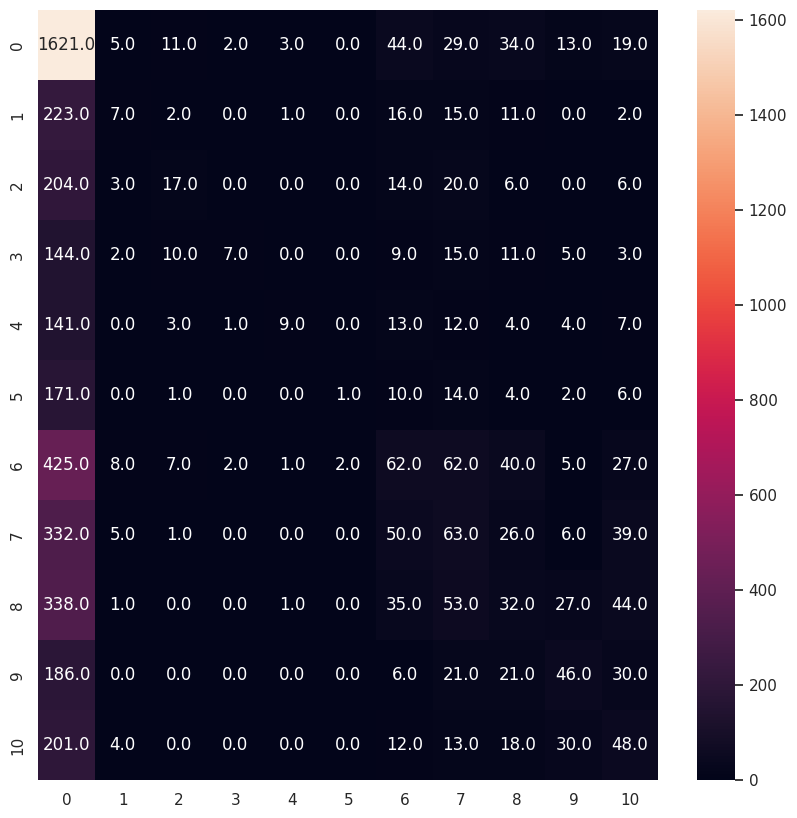

In [114]:
show_model_report(BEST_NEIGHBORS_NAME)

Мне не нужно доверять улучшение моделей, стало все только хуже

# Итоги

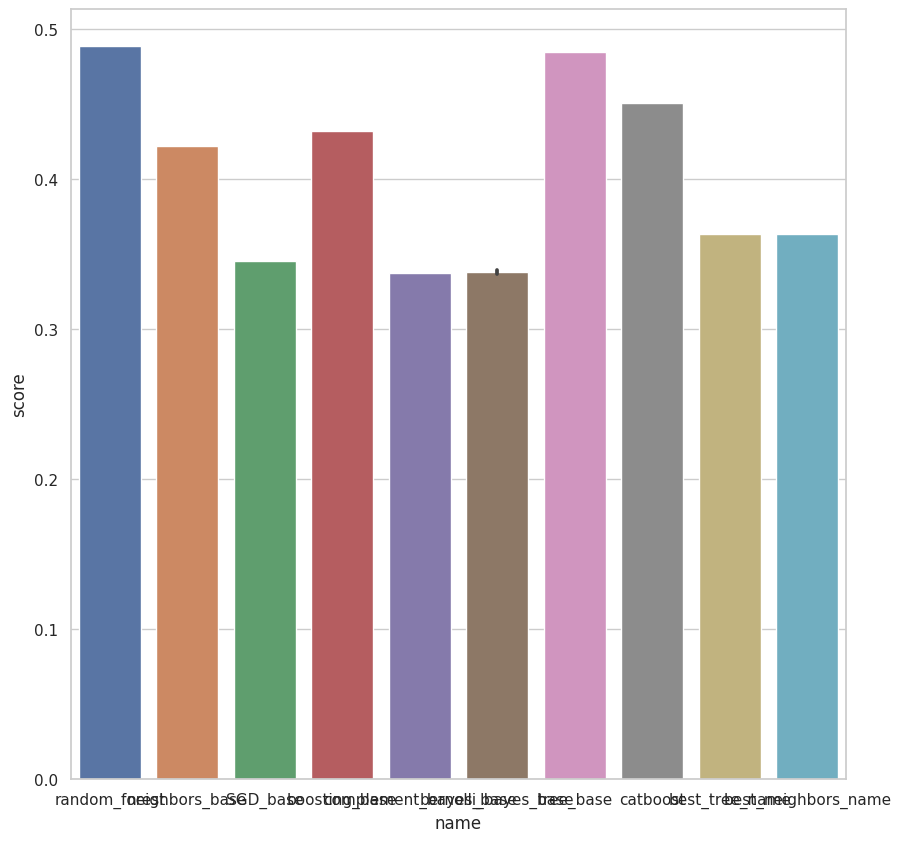

In [115]:
show_total_report()

Лучше всего себя показал стандартный лес и дерево
модели не поддались улучшению
Почему то на разных машинах результат сильно отличается